<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_7/Convnet_visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests, io

from tensorflow import keras

In [0]:
from matplotlib import style
style.use('default')

# Reconstruction of an image

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [0]:
n_w, n_h = X[0].shape

In [0]:
model = keras.models.Sequential()
 
model.add(keras.layers.Dense(100, activation='relu', input_shape = (  n_w*n_h, )))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# model.compile(loss='mean_squared_error',
#               optimizer='rmsprop',
#              metrics = ['accuracy'])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.build((None, n_w*n_h ))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               102500    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 123,710
Trainable params: 123,710
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train.reshape(-1, n_w*n_h), Y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test.reshape(-1, n_w*n_h), Y_test))


Train on 76764 samples, validate on 25588 samples
Epoch 1/10
76764/76764 [==============================] - 10s 135us/sample - loss: 0.1320 - acc: 0.9604 - val_loss: 0.0837 - val_acc: 0.9742
Epoch 2/10
76764/76764 [==============================] - 11s 143us/sample - loss: 0.0544 - acc: 0.9822 - val_loss: 0.0678 - val_acc: 0.9794
Epoch 3/10
76764/76764 [==============================] - 12s 150us/sample - loss: 0.0385 - acc: 0.9879 - val_loss: 0.0652 - val_acc: 0.9834
Epoch 4/10
76764/76764 [==============================] - 10s 129us/sample - loss: 0.0298 - acc: 0.9901 - val_loss: 0.0543 - val_acc: 0.9849
Epoch 5/10
76764/76764 [==============================] - 10s 129us/sample - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0633 - val_acc: 0.9846
Epoch 6/10
76764/76764 [==============================] - 10s 128us/sample - loss: 0.0217 - acc: 0.9929 - val_loss: 0.0663 - val_acc: 0.9845
Epoch 7/10
76764/76764 [==============================] - 10s 129us/sample - loss: 0.0164 - acc: 0.9949 

In [0]:
from keras import layers
from keras import models

nc_model = models.Sequential()
nc_model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(n_w , n_h, 1)))
nc_model.add(layers.MaxPooling2D((2, 2)))
nc_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
nc_model.add(layers.MaxPooling2D((2, 2)))
nc_model.add(layers.Conv2D(32, (3, 3), activation='relu'))

nc_model.add(layers.Flatten())
# nc_model.add(layers.Dropout(0.5))

nc_model.add(layers.Dense(100, activation='relu'))
nc_model.add(layers.Dropout(0.5))

nc_model.add(layers.Dense(10, activation='softmax'))

nc_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

nc_model.build((None, n_w*n_h ))


nc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 4)         40        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 16)        592       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               51300     
__________

In [0]:
nc_history = nc_model.fit(X_train.reshape(-1, n_w,n_h,1), Y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test.reshape(-1,  n_w,n_h,1), Y_test))


Train on 76764 samples, validate on 25588 samples
Epoch 1/10
76764/76764 [==============================] - 15s 199us/step - loss: 0.1832 - acc: 0.9439 - val_loss: 0.0430 - val_acc: 0.9859
Epoch 2/10
76764/76764 [==============================] - 12s 157us/step - loss: 0.0534 - acc: 0.9841 - val_loss: 0.0293 - val_acc: 0.9903
Epoch 3/10
76764/76764 [==============================] - 12s 158us/step - loss: 0.0398 - acc: 0.9883 - val_loss: 0.0243 - val_acc: 0.9918
Epoch 4/10
76764/76764 [==============================] - 12s 158us/step - loss: 0.0322 - acc: 0.9904 - val_loss: 0.0220 - val_acc: 0.9936
Epoch 5/10
76764/76764 [==============================] - 13s 175us/step - loss: 0.0274 - acc: 0.9917 - val_loss: 0.0309 - val_acc: 0.9909
Epoch 6/10
76764/76764 [==============================] - 12s 158us/step - loss: 0.0230 - acc: 0.9928 - val_loss: 0.0204 - val_acc: 0.9941
Epoch 7/10
76764/76764 [==============================] - 12s 157us/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.

# Visulaization

In [0]:
# from keras import models
from tensorflow.keras.models import Model

In [0]:
## Let's first make a list of layers that we want ot visulaize.
vis_layers = [l.output for l in nc_model.layers]

## Now we create a multi-output model. 
## The following returns a model that output the output of all the layers, simar to ourown implementation of feedforward function. 
vis_model = models.Model( inputs = nc_model.input, outputs = vis_layers )

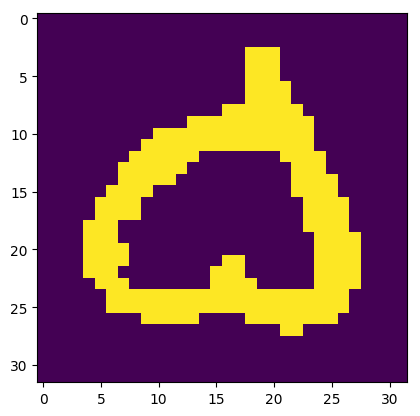

In [0]:
ind = np.random.randint(len(X_test))

img = X_test[ind]
plt.imshow(img.reshape(n_w, n_h))
plt.show()


In [0]:
vis_prediction = vis_model.predict( [[img.reshape(n_w,n_h,1)]] )

In [0]:
j = 0
vis_prediction[j].shape[-1]

4

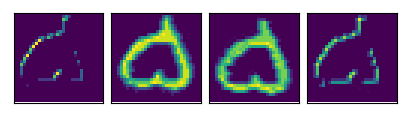

In [0]:
fig = plt.figure(figsize=(10,10))

for i in range( (vis_prediction[j].shape[-1]) ):
  ax = fig.add_subplot(4, 8,i+1)# , title = 'The output of channel {} in layer {}'.format(i+1, j) )
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(vis_prediction[j][0, :, :, i])
  ax.set_aspect('equal')
  

plt.subplots_adjust(wspace=0.1, hspace=-.77)

# plt.tight_layout()
plt.show()  